In [9]:
import pickle
import pandas as pd
import requests
import time
import json

In [10]:
dskey = pickle.load(open("darkskyapi.p",'rb'))
open("darkskyapi.p",'rb').close

date_vars = ['Date']


air_df = pd.read_csv('SampleAir.csv',parse_dates=date_vars, date_parser=pd.to_datetime)

air_df.sample(5)

,Date,Source,Site ID,POC,Daily Max 1-hour NO2 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
15,2018-01-16,AQS,60131004,1,19.0,ppb,18,San Pablo,23,96.0,42602,Nitrogen dioxide (NO2),41860,"San Francisco-Oakland-Hayward, CA",6,California,13,Contra Costa,37.9604,-122.356811
36,2018-02-07,AQS,60131004,1,31.7,ppb,29,San Pablo,23,96.0,42602,Nitrogen dioxide (NO2),41860,"San Francisco-Oakland-Hayward, CA",6,California,13,Contra Costa,37.9604,-122.356811
190,2018-07-12,AQS,60131004,1,8.3,ppb,8,San Pablo,23,96.0,42602,Nitrogen dioxide (NO2),41860,"San Francisco-Oakland-Hayward, CA",6,California,13,Contra Costa,37.9604,-122.356811
266,2018-09-26,AQS,60131004,1,11.6,ppb,10,San Pablo,20,83.0,42602,Nitrogen dioxide (NO2),41860,"San Francisco-Oakland-Hayward, CA",6,California,13,Contra Costa,37.9604,-122.356811
259,2018-09-19,AQS,60131004,1,14.7,ppb,13,San Pablo,23,96.0,42602,Nitrogen dioxide (NO2),41860,"San Francisco-Oakland-Hayward, CA",6,California,13,Contra Costa,37.9604,-122.356811


In [11]:
long = air_df.iloc[299,-1]

lat =air_df.iloc[299,-2]

day = air_df.iloc[298,0]
#day = pd.to_datetime(day , format ='%m/%d/%Y')

day = int(time.mktime(day.timetuple()))

In [12]:
url ='https://api.darksky.net/forecast/'+dskey+'/'+str(lat)+','+str(long)+','+str(day)

In [13]:
weather= requests.get(url)


In [14]:
weather.json()['daily']['data'][0]

{'time': 1540796400,
 'summary': 'Clear throughout the day.',
 'icon': 'clear-day',
 'sunriseTime': 1540823608,
 'sunsetTime': 1540862108,
 'moonPhase': 0.68,
 'precipIntensity': 0,
 'precipIntensityMax': 0,
 'precipProbability': 0,
 'dewPoint': 43.5,
 'humidity': 0.56,
 'pressure': 1021.22,
 'windSpeed': 3.9,
 'windGust': 12.43,
 'windGustTime': 1540803600,
 'windBearing': 309,
 'cloudCover': 0.02,
 'uvIndex': 3,
 'uvIndexTime': 1540836000,
 'visibility': 10,
 'temperatureMin': 56.4,
 'temperatureMinTime': 1540821600,
 'temperatureMax': 68.55,
 'temperatureMaxTime': 1540854000,
 'apparentTemperatureMin': 56.4,
 'apparentTemperatureMinTime': 1540821600,
 'apparentTemperatureMax': 68.55,
 'apparentTemperatureMaxTime': 1540854000}

In [ ]:
# day_length =[]
# temp_high =[]
# temp_low =[]
# dew_point =[]
# humidity =[]
# pressure =[]
# wind_speed =[]
# wind_bearing =[]
# cloud_cover =[]
# uv_index =[]

# for i in range(air_df.shape[0]):
#     try:
#         long = air_df.iloc[i,-1]
#         lat =air_df.iloc[i,-2]
#         day = air_df.iloc[i,0]
#         day = pd.to_datetime(day , format ='%m/%d/%Y')
#         day = int(time.mktime(day.timetuple()))
#         url ='https://api.darksky.net/forecast/'+dskey+'/'+str(lat)+','+str(long)+','+str(day)
#         weather= requests.get(url)
#         day_length.append(weather.json()['daily']['data'][0]['sunsetTime'] - weather.json()['daily']['data'][0]['sunriseTime'])
#         try:
#             temp_high.append(weather.json()['daily']['data'][0]['temperatureHigh'])
#         except:
#             temp_high.append(weather.json()['daily']['data'][0]['temperatureMax'])
#         try:
#             temp_low.append(weather.json()['daily']['data'][0]['temperatureLow'])
#         except:
#             temp_low.append(weather.json()['daily']['data'][0]['temperatureMin'])
#         dew_point.append(weather.json()['daily']['data'][0]['dewPoint'])
#         humidity.append(weather.json()['daily']['data'][0]['humidity'])
#         pressure.append(weather.json()['daily']['data'][0]['pressure'])
#         wind_speed.append(weather.json()['daily']['data'][0]['windSpeed'])
#         wind_bearing.append(weather.json()['daily']['data'][0]['windBearing'])
#         cloud_cover.append(weather.json()['daily']['data'][0]['cloudCover'])
#         uv_index.append(weather.json()['daily']['data'][0]['uvIndex'])
#     except:
#         print('broken at: ' +str(i))

    

In [ ]:
# air_df['day_length'] = day_length
# air_df['temp_high'] = temp_high
# air_df['temp_low'] = temp_low
# air_df['dew_point'] = dew_point
# air_df['humidity'] = humidity
# air_df['pressure'] = pressure
# air_df['wind_speed'] = wind_speed
# air_df['wind_bearing'] = wind_bearing
# air_df['cloud_cover'] = cloud_cover
# air_df['uv_index'] = uv_index

In [ ]:
# pickle.dump(air_df, open('air_df_1.p','wb'))

In [16]:
air_df = pickle.load(open("air_df_1.p",'rb'))
open('air_df_1.p','rb').close

<function BufferedReader.close>

In [17]:
air_df.columns

Index(['Date', 'Source', 'Site ID', 'POC',
       'Daily Max 1-hour NO2 Concentration', 'UNITS', 'DAILY_AQI_VALUE',
       'Site Name', 'DAILY_OBS_COUNT', 'PERCENT_COMPLETE',
       'AQS_PARAMETER_CODE', 'AQS_PARAMETER_DESC', 'CBSA_CODE', 'CBSA_NAME',
       'STATE_CODE', 'STATE', 'COUNTY_CODE', 'COUNTY', 'SITE_LATITUDE',
       'SITE_LONGITUDE', 'day_length', 'temp_high', 'temp_low', 'dew_point',
       'humidity', 'pressure', 'wind_speed', 'wind_bearing', 'cloud_cover',
       'uv_index'],
      dtype='object')

In [18]:
df =air_df[['Date','Daily Max 1-hour NO2 Concentration']]

In [19]:
df.set_index('Date',inplace=True)

In [20]:
from pathlib import Path
import pandas as pd
import numpy as np
import pandas_profiling
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
from sklearn.preprocessing import MinMaxScaler

from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import model_from_json

Using TensorFlow backend.


In [21]:
train = df.query('Date < "2018-07-01"')
valid = df.query('Date >= "2018-07-01" and Date < "2018-11-01"')
test = df.query('Date >= "2018-11-02"')

In [22]:
# Save column names and indices to use when storing as csv
cols = train.columns
train_idx = train.index
valid_idx = valid.index
test_idx = test.index

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(train)
valid = scaler.transform(valid)
test = scaler.transform(test)

In [23]:
def plot_loss(history, title):
    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(title)
    plt.xlabel('Nb Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    val_loss = history.history['val_loss']
    min_idx = np.argmin(val_loss)
    min_val_loss = val_loss[min_idx]
    print('Minimum validation loss of {} reached at epoch {}'.format(min_val_loss, min_idx))

In [24]:
n_lag = 14

train_data_gen = TimeseriesGenerator(train, train, length=n_lag, sampling_rate=1, stride=1, batch_size = 5)
valid_data_gen = TimeseriesGenerator(train, train, length=n_lag, sampling_rate=1, stride=1, batch_size = 1)
test_data_gen = TimeseriesGenerator(test, test, length=n_lag, sampling_rate=1, stride=1, batch_size = 1)

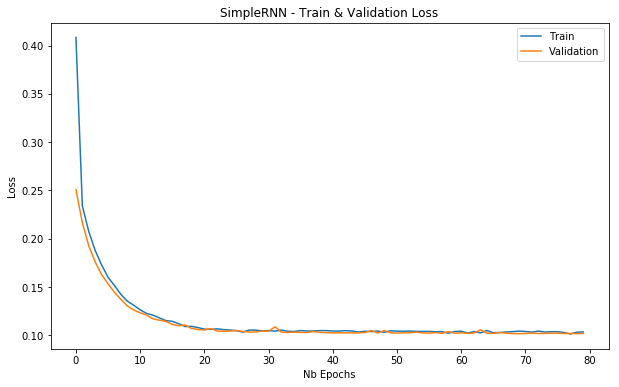

Minimum validation loss of 0.10183886488278707 reached at epoch 69


In [29]:
simple_rnn = Sequential()
simple_rnn.add(SimpleRNN(5, input_shape=(n_lag, 1)))
simple_rnn.add(Dense(1))
simple_rnn.compile(loss='mae', optimizer=RMSprop())

checkpointer = ModelCheckpoint(filepath='simple_rnn_weights.hdf5'
                               , verbose=0
                               , save_best_only=True)
earlystopper = EarlyStopping(monitor='val_loss'
                             , patience=10
                             , verbose=0)
with open("simple_rnn.json", "w") as m:
     m.write(simple_rnn.to_json())

simple_rnn_history = simple_rnn.fit_generator(train_data_gen
                                              , epochs=100
                                              , validation_data=valid_data_gen
                                              , verbose=0
                                              , callbacks= [earlystopper])
plot_loss(simple_rnn_history, 'SimpleRNN - Train & Validation Loss')

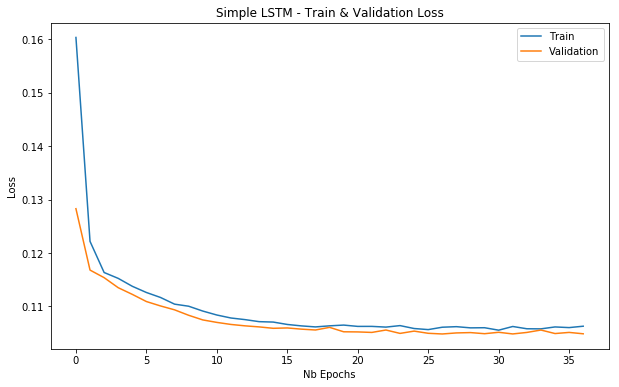

Minimum validation loss of 0.1048379123210907 reached at epoch 26


In [30]:
simple_lstm = Sequential()
simple_lstm.add(LSTM(5, input_shape=(n_lag, 1)))
simple_lstm.add(Dense(1))
simple_lstm.compile(loss='mae', optimizer=RMSprop())

checkpointer = ModelCheckpoint(filepath='simple_lstm_weights.hdf5'
                               , verbose=0
                               , save_best_only=True)
earlystopper = EarlyStopping(monitor='val_loss'
                             , patience=10
                             , verbose=0)
with open("simple_lstm.json", "w") as m:
    m.write(simple_lstm.to_json())

simple_lstm_history = simple_lstm.fit_generator(train_data_gen
                                                , epochs=100
                                                , validation_data=valid_data_gen
                                                , verbose=0
                                                , callbacks=[checkpointer, earlystopper])
plot_loss(simple_lstm_history, 'Simple LSTM - Train & Validation Loss')

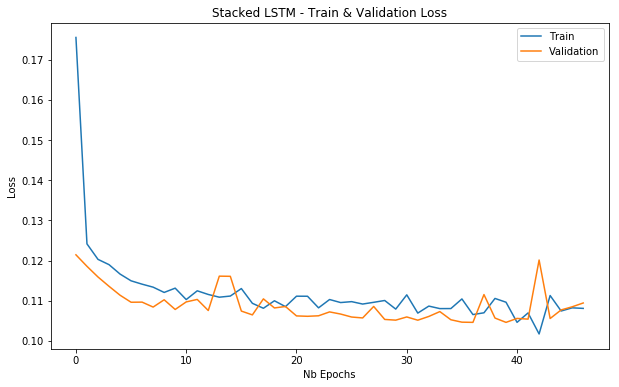

Minimum validation loss of 0.10461300304441741 reached at epoch 36


In [32]:
stacked_lstm = Sequential()
stacked_lstm.add(LSTM(16, input_shape=(n_lag, 1), return_sequences=True))
stacked_lstm.add(LSTM(8, return_sequences=True))
stacked_lstm.add(LSTM(4))
stacked_lstm.add(Dense(1))
stacked_lstm.compile(loss='mae', optimizer=RMSprop())

checkpointer = ModelCheckpoint(filepath='stacked_lstm_weights.hdf5'
                               , verbose=0
                               , save_best_only=True)
earlystopper = EarlyStopping(monitor='val_loss'
                             , patience=10
                             , verbose=0)
with open("stacked_lstm.json", "w") as m:
    m.write(stacked_lstm.to_json())

stacked_lstm_history = stacked_lstm.fit_generator(train_data_gen
                                                  , epochs=100
                                                  , validation_data=valid_data_gen
                                                  , verbose=0
                                                  , callbacks=[checkpointer, earlystopper])
plot_loss(stacked_lstm_history, 'Stacked LSTM - Train & Validation Loss')